# ACCIDENT BIG DATA ANALYTICS

### Import the Python Libraries

In [1]:
# Import database library
import sqlite3 as sq

#import data analysis and manipulation library
import pandas as pd

# import data visualization library
import matplotlib.pyplot as plt

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')




### 1.0 Connect the Database to the environment



In [2]:
# write a code to connect to the database
conn =  sq.connect("accident_data_v1.0.0_2023.db")
conn

### 1.1 Creating a Cursor for operation execution

In [3]:
# create a cursor after the connection
curr = conn.cursor()
curr

### 2.0 Getting Information from the tables in the database

#### 2.0.1 Create a Function to check fields in accident table

In [4]:
def tableInfo(data):

    try:
        # fetching information from the database
        info = curr.execute(f"PRAGMA table_info({data})")
        # getting all fields in the table and saving it in the variable data
        return info.fetchall()
    except:
        print("table does not exist")

#### 2.0.2 Check Information for the Accident data

In [5]:
# getting all fields in the table and saving it in the variable accident
accident = tableInfo("accident")
accident

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

#### 2.0.3 Check Information for the vehicle data


In [6]:
# getting all fields in the table and saving it in the variable vehicle
vehicle = tableInfo("vehicle")
vehicle

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

#### 2.0.3 Check Information for the casualty data

In [7]:
# getting all fields in the table and saving it in the variable vehicle
casualty = tableInfo("casualty")
casualty

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

#### 2.0.4 Check Information for the Lsoa data

In [8]:
# getting all fields in the table and saving it in the variable lsoa
lsoa = tableInfo("lsoa")
lsoa

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

### 3.0 Querying the data using the Standard Query Language(SQL)

#### 3.0.1 Write a function that will Query the database with pandas

In [9]:
def readTable(data):

    try:
        #read the query and transform it to a dataframe!
        info = pd.read_sql_query(f"SELECT * FROM {data}" , conn)
        return info

    except:
        print("table not found")
        

#### 3.1 Querying the accident data

In [10]:
#reading the accident dataframe from the database using the read_sql_query function on pandas
acc_df = readTable("accident")
acc_df

accident_index  accident_year accident_reference  \
0       2017010001708           2017          010001708   
1       2017010009342           2017          010009342   
2       2017010009344           2017          010009344   
3       2017010009348           2017          010009348   
4       2017010009350           2017          010009350   
...               ...            ...                ...   
461347  2020991027064           2020          991027064   
461348  2020991029573           2020          991029573   
461349  2020991030297           2020          991030297   
461350  2020991030900           2020          991030900   
461351  2020991032575           2020          991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    532920.0                196330.0  -0.080107  51.650061   
1                    526790.0                181970.0  -0.173845  51.522425   
2                    535200.0                181260.0  -0.052969  51.514096   
3                    534340.0                193560.0  -0.060658  51.624832   
4                    533680.0                187820.0  -0.072372  51.573408   
...                       ...                     ...        ...        ...   
461347               343034.0                731654.0  -2.926320  56.473539   
461348               257963.0                658891.0  -4.267565  55.802353   
461349               383664.0                810646.0  -2.271903  57.186317   
461350               277161.0                674852.0  -3.968753  55.950940   
461351               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  1                   2  ...   
1                  1                  3                   2  ...   
2                  1                  3                   3  ...   
3                  1                  3                   2  ...   
4                  1                  2                   1  ...   
...              ...                ...                 ...  ...   
461347            99                  2                   2  ...   
461348            99                  3                   1  ...   
461349            99                  2                   2  ...   
461350            99                  3                   2  ...   
461351            99                  3                   1  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
0                                             0                4   
1                                             0                4   
2                                             0                4   
3                                             4                4   
4                                             5                4   
...                                         ...              ...   
461347                                        0                1   
461348                                        0                1   
461349                                        0                1   
461350                                        0                1   
461351                                        0                1   

        weather_conditions road_surface_conditions  \
0                        1                       1   
1                        1                       2   
2                        1                       1   
3                        2                       2   
4                        1                       2   
...                    ...                     ...   
461347                   1                       1   
461348                   1                       1   
461349                   1                       1   
461350                   1                       1   
461351                   1                       1   

        special_conditions_at_site carriageway_hazards urban_or_ru

In [11]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

#### 3.2 Querying the vehicle data

In [12]:
#reading the vehicle dataframe from the database using the read_sql_query function on pandas
veh_df = readTable("vehicle")
veh_df

vehicle_index accident_index  accident_year accident_reference  \
0                   0  2017010001708           2017          010001708   
1                   1  2017010001708           2017          010001708   
2                   2  2017010009342           2017          010009342   
3                   3  2017010009342           2017          010009342   
4                   4  2017010009344           2017          010009344   
...               ...            ...            ...                ...   
849086         849086  2020991030297           2020          991030297   
849087         849087  2020991030297           2020          991030297   
849088         849088  2020991030900           2020          991030900   
849089         849089  2020991030900           2020          991030900   
849090         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        0   
1                       2             2                        0   
2                       1             9                        0   
3                       2             9                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
849086                  1             9                        0   
849087                  2             5                        0   
849088                  1             9                        0   
849089                  2             1                        0   
849090                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                      18                       1                     5  ...   
1                      18                       1                     5  ...   
2                      18                       5                     1  ...   
3                      18                       5                     1  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
849086                  7                       8                     2  ...   
849087                 16                       6                     2  ...   
849088                  7                       8                     2  ...   
849089                 18                       6                     2  ...   
849090                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              1             24   
1                               6              1             19   
2                               6              1             33   
3                               6              1             40   
4                               6              3             -1   
...                           ...            ...            ...   
849086                          1              1             57   
849087                          5              1             38   
849088                          6              2             68   
849089                          6              1             76   
849090                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        5                1997                2   
1                        4                  -1               -1   
2                        6                1797                8   
3                        7                2204                2   
4                       -1                  -1               -1   
...                    ...                 ...              ...   
849086                   9                1968                2   


#### 3.3 Querying the casualty data

In [13]:
#reading the casualty dataframe from the database using the read_sql_query function on pandas
cas_df = readTable("casualty")
cas_df

casualty_index accident_index  accident_year accident_reference  \
0                    0  2017010001708           2017          010001708   
1                    1  2017010001708           2017          010001708   
2                    2  2017010001708           2017          010001708   
3                    3  2017010009342           2017          010009342   
4                    4  2017010009344           2017          010009344   
...                ...            ...            ...                ...   
600327          600327  2020991027064           2020          991027064   
600328          600328  2020991029573           2020          991029573   
600329          600329  2020991030297           2020          991030297   
600330          600330  2020991030900           2020          991030900   
600331          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               2   
1                       2                   2               1   
2                       2                   3               2   
3                       1                   1               2   
4                       3                   1               1   
...                   ...                 ...             ...   
600327                  2                   1               1   
600328                  1                   1               3   
600329                  2                   1               1   
600330                  2                   1               1   
600331                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     2               18                     4   
1                     1               19                     4   
2                     1               18                     4   
3                     2               33                     6   
4                     2               31                     6   
...                 ...              ...                   ...   
600327                1               11                     3   
600328                2               63                     9   
600329                1               38                     7   
600330                1               76                    11   
600331                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    0                    0   
1                       2                    0                    0   
2                       1                    0                    0   
3                       3                    0                    0   
4                       3                    0                    0   
...                   ...                  ...                  ...   
600327                  2                    0                    0   
600328                  3                   10                    1   
600329                  2                    0                    0   
600330                  3                    0                    0   
600331                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   1                       0   
1                   0                       0   
2                   0                       0   
3                   1                       0   
4                   0                       0   
...               ...                     ...   
600327              0                       0   
600328              0                       0   
600329              0                       0   
600330              0                       0   
600331              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

#### 3.4 Querying the lsoa data

In [14]:
#reading the casualty dataframe from the database using the read_sql_query function on pandas
lsoa_df = readTable("lsoa")
lsoa_df

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

### 4.0 Filtering The 2020 Data for Accident , Vehicle and Casualty

#### 4.0.1 Create a Function to query data for the year 2020

In [15]:
#write a function that filters by accident_year which is 2020
def filter2020(data):
    try:
        info = pd.read_sql_query(f"SELECT * FROM {data} WHERE accident_year = 2020", conn)
        return info
    except():
        print("data not available")

#### 4.1 Query the Accident data for the year 2020

In [16]:
# Run the function that queries accident data for 2020
accident2020 = filter2020("accident")
accident2020

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [17]:
accident2020["accident_severity"].unique()

array([3, 2, 1])

#### 4.2 Query the Vehicle data for the year 2020

In [18]:
# Run the function that queries vehicle data for 2020
vehicle2020 = filter2020("vehicle")
vehicle2020

vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


#### 4.3 Query the Casualty data for the year 2020

In [19]:
# Run the function that queries casualty data for 2020
casualty2020 = filter2020("casualty")
casualty2020

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

### 5.0 Exploratory Data Analysis

#### 5.1 Checking for Missing Values

In [20]:
# write a function that checks for missing values
def checkMissingValues(data):
    df = data.info()
    return df

#### 5.2 Accident2020 Data

In [21]:
# run the function on accident data 
checkMissingValues(accident2020)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

#### 5.3 The report shows that There are missing values in these columns For Accident2020 data  </h4>
<li> 3 missing values in location_easting_osgr </li>
<li> 4 missing values in  location_northing_osgr </li>
<li> 5 missing values in longitude </li>
<li> 6 missing values in latitude </li>

#### 5.3.1 Vehicle2020 Data

In [22]:
# run the function on vehicle data 
checkMissingValues(vehicle2020)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

#### 5.3.2 The report shows that There are no missing values in these columns For Vehicle2020 data </h4>

#### 5.4 Casualty2020 Data

In [23]:
# run the function on vehicle data 
checkMissingValues(casualty2020)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

#### 5.5 The report shows that There are no missing values in these columns For Casualty2020 data </h4>

##### Year is Missing in LSOA .  So it was ignored.

##### Write a function that will analyze the days of week and hours of the day on both accident data and vehicle type


In [24]:
def daysHoursAnalysis(data , genTitle1 , genTitle2, yLabel1, yLabel2):
    # trying to convert time to datetime
    data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'] , dayfirst=True)
    
    # transform to hour and day of the week.
    data['hour'] = data['datetime'].dt.hour
    data['day_of_week'] =data['datetime'].dt.day_name()
    
    # Visualization
    
    # Distribution of accidents by hour of the day
    plt.figure(figsize=(16, 6))
    data['hour'].value_counts().sort_index().plot(kind='bar')
    plt.title(genTitle1)
    plt.xlabel('Hour of the Day')
    plt.ylabel(yLabel1)
    plt.grid(False)
    plt.show()
    
    # Distribution of accidents by day of the week
    plt.figure(figsize=(16, 6))
    data['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
    plt.title(genTitle2)
    plt.xlabel('Day of the Week')
    plt.ylabel(yLabel2)
    plt.grid(False)
    plt.show()
    

### 6.0 Are there significant hours of the day and days of the week on which accident occurs?

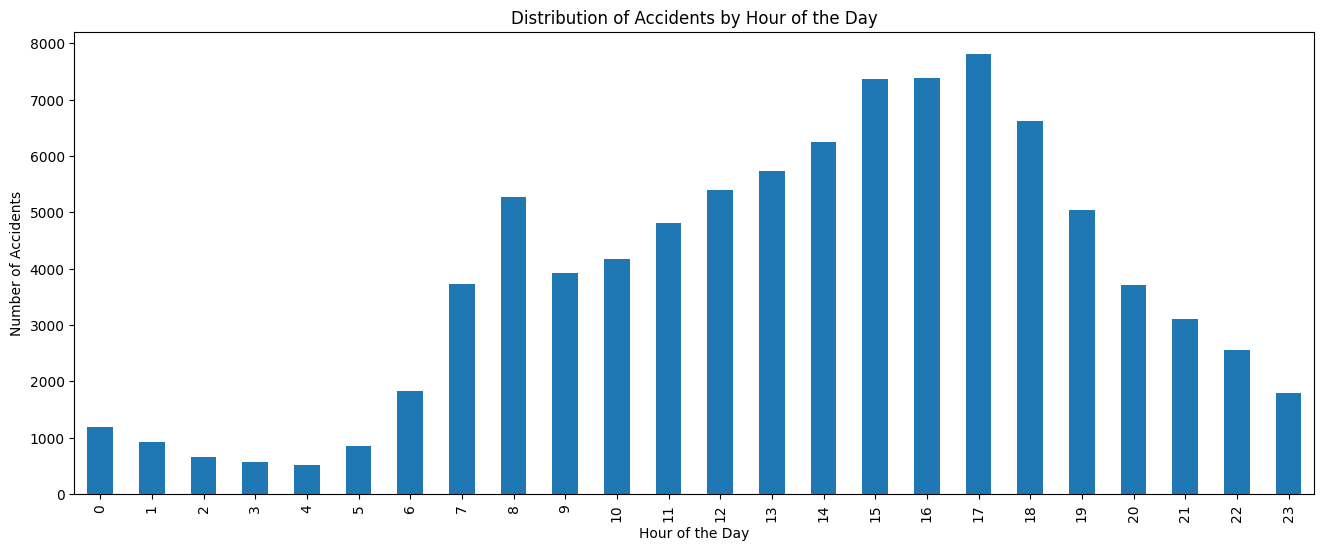

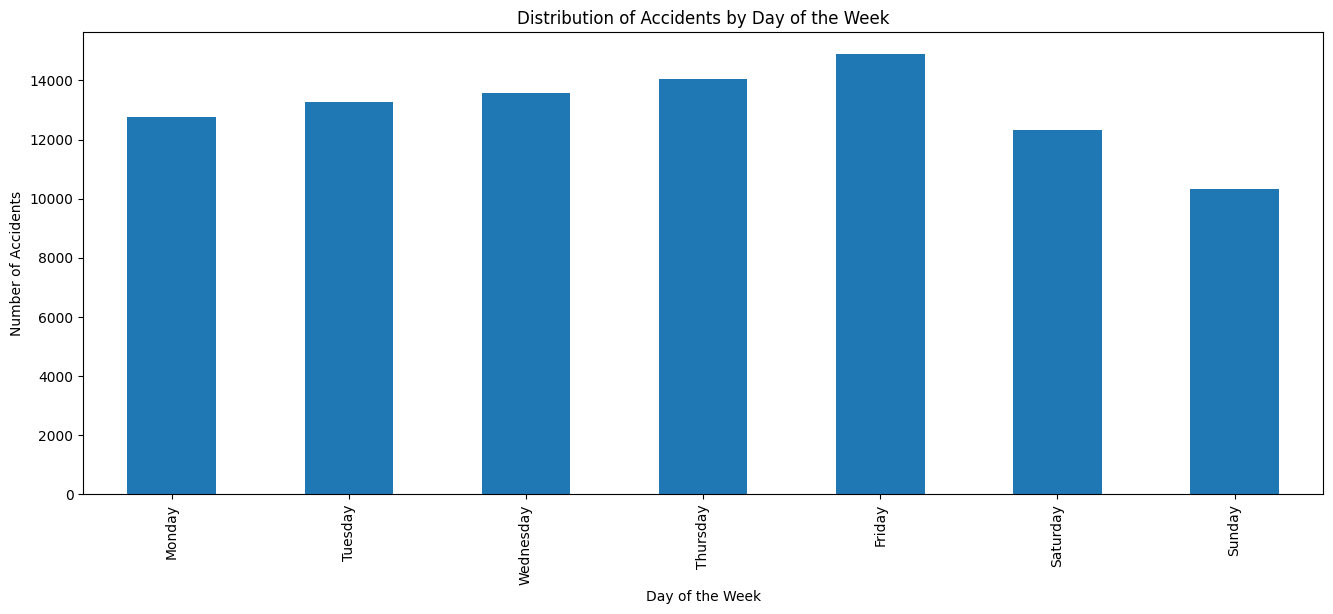

In [25]:
# give analysis on hours of the day and days of the week on which accident occurs
daysHoursAnalysis(accident2020 , 'Distribution of Accidents by Hour of the Day' , 'Distribution of Accidents by Day of the Week', 'Number of Accidents', 'Number of Accidents')

### 7.0 For Motorbikes are there significant hours of the day , and days of the week on which accidents occur? We suggest a focus on Motorcycle 125cc and over 500cc

In [26]:
# We have to check the vehicle2020 data and check vehicle types
vehicle2020["vehicle_type"].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16])

In [27]:
#  Merging the accident2020  to the vehicle2020 using accident_index as the foreign key
accident_vehicle2020 = pd.merge(accident2020, vehicle2020, left_on='accident_index', right_on='accident_index', how='inner')
accident_vehicle2020

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010228005             2020            010228005   
3       2020010228006             2020            010228006   
4       2020010228011             2020            010228011   
...               ...              ...                  ...   
167370  2020991030297             2020            991030297   
167371  2020991030297             2020            991030297   
167372  2020991030900             2020            991030900   
167373  2020991030900             2020            991030900   
167374  2020991032575             2020            991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    526432.0                182761.0  -0.178719  51.529614   
3                    538676.0                184371.0  -0.001683  51.541210   
4                    529324.0                181286.0  -0.137592  51.515704   
...                       ...                     ...        ...        ...   
167370               383664.0                810646.0  -2.271903  57.186317   
167371               383664.0                810646.0  -2.271903  57.186317   
167372               277161.0                674852.0  -3.968753  55.950940   
167373               277161.0                674852.0  -3.968753  55.950940   
167374               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  2                   1  ...   
4                  1                  3                   1  ...   
...              ...                ...                 ...  ...   
167370            99                  2                   2  ...   
167371            99                  2                   2  ...   
167372            99                  3                   2  ...   
167373            99                  3                   2  ...   
167374            99                  3                   1  ...   

        journey_purpose_of_driver sex_of_driver age_of_driver  \
0                               6             2            32   
1                               2             1            45   
2                               6             3            -1   
3                               1             1            44   
4                               6             1            20   
...                           ...           ...           ...   
167370                          1             1            57   
167371                          5             1            38   
167372                          6             2            68   
167373                          6             1            76   
167374                          6             1            39   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
0                       6                1968               2              6   
1                       7                1395               1              2   
2                      -1                  -1              -1             -1   
3                       7                1798               8              8   
4                       4                2993               2              4   
...                   ...                 ...             ...            ...   
167370                  9                1968               2              2   
167371                  7                1301               1  

#### 7.1 Motorcycle 50cc and under 

In [28]:
# filtering the vehicle type motorcycles of 50cc and under
vehicle2020_motorcycle_50cc = accident_vehicle2020[accident_vehicle2020["vehicle_type"] == 2]
vehicle2020_motorcycle_50cc

accident_index  accident_year_x accident_reference_x  \
32      2020010228077             2020            010228077   
123     2020010228288             2020            010228288   
132     2020010228300             2020            010228300   
211     2020010228455             2020            010228455   
263     2020010228540             2020            010228540   
...               ...              ...                  ...   
165798  2020990989069             2020            990989069   
165977  2020990991664             2020            990991664   
166014  2020990992681             2020            990992681   
166683  2020991002390             2020            991002390   
167003  2020991007258             2020            991007258   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
32                   531477.0                174550.0  -0.109087  51.454673   
123                  520256.0                181051.0  -0.268292  51.515593   
132                  532082.0                180189.0  -0.098278  51.505208   
211                  522665.0                182943.0  -0.232933  51.532080   
263                  526974.0                164228.0  -0.177553  51.362934   
...                       ...                     ...        ...        ...   
165798               235177.0                625988.0  -4.610940  55.499791   
165977               259091.0                667889.0  -4.254257  55.883466   
166014               324804.0                673253.0  -3.205595  55.946405   
166683               320067.0                566676.0  -3.250734  54.988240   
167003               202589.0                631031.0  -5.129652  55.532958   

        police_force  accident_severity  number_of_vehicles  ...  \
32                 1                  2                   2  ...   
123                1                  3                   2  ...   
132                1                  3                   2  ...   
211                1                  2                   1  ...   
263                1                  3                   2  ...   
...              ...                ...                 ...  ...   
165798            99                  2                   2  ...   
165977            99                  3                   1  ...   
166014            99                  3                   2  ...   
166683            99                  2                   2  ...   
167003            99                  3                   1  ...   

        journey_purpose_of_driver sex_of_driver age_of_driver  \
32                              6             1            19   
123                             6             1            16   
132                             6             1            16   
211                             6             3            -1   
263                             6             1            16   
...                           ...           ...           ...   
165798                          6             2            43   
165977                          6             1            61   
166014                          1             1            38   
166683                          6             1            16   
167003                          5             1            16   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
32                      4                  -1              -1             -1   
123                     4                  49               1             10   
132                     4                  48               1             11   
211                    -1                  -1              -1             -1   
263                     4                  49               1              2   
...                   ...                 ...             ...            ...   
165798                  7                  49               1             28   
165977                  9                  50               1  

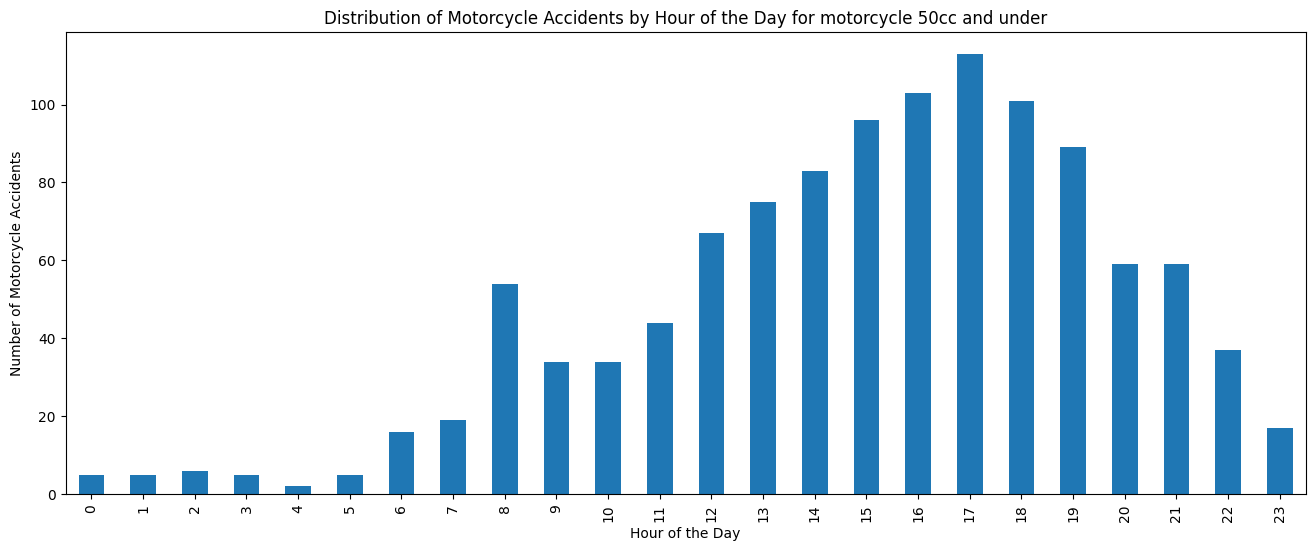

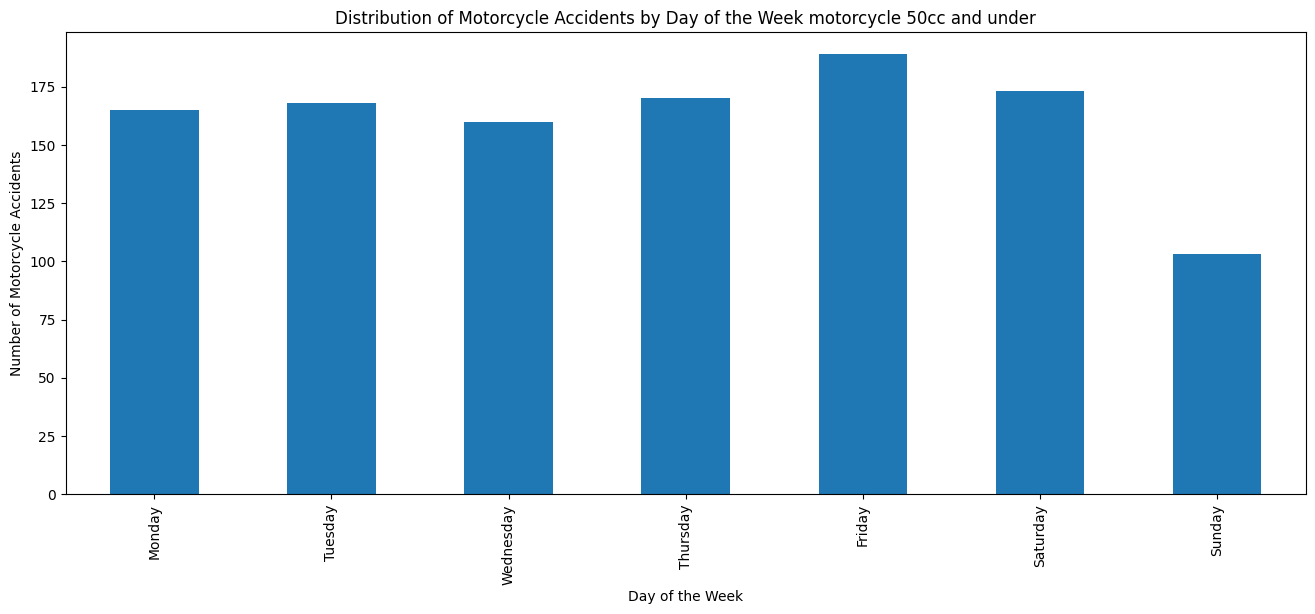

In [29]:
# run this data with the function
daysHoursAnalysis(vehicle2020_motorcycle_50cc, 'Distribution of Motorcycle Accidents by Hour of the Day for motorcycle 50cc and under', 'Distribution of Motorcycle Accidents by Day of the Week motorcycle 50cc and under', 'Number of Motorcycle Accidents', 'Number of Motorcycle Accidents')

#### 7.2 Motorcycle 50cc up to 125cc

In [30]:
# filtering the vehicle type motorcycles up to 125cc
vehicle2020_motorcycle50cc_125cc = accident_vehicle2020[accident_vehicle2020["vehicle_type"] == 3]
vehicle2020_motorcycle50cc_125cc

accident_index  accident_year_x accident_reference_x  \
12      2020010228020             2020            010228020   
33      2020010228086             2020            010228086   
36      2020010228097             2020            010228097   
58      2020010228148             2020            010228148   
77      2020010228207             2020            010228207   
...               ...              ...                  ...   
167091  2020991008618             2020            991008618   
167149  2020991009778             2020            991009778   
167195  2020991010130             2020            991010130   
167292  2020991011809             2020            991011809   
167301  2020991012311             2020            991012311   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
12                   529718.0                192342.0  -0.127840  51.614971   
33                   531043.0                176304.0  -0.114680  51.470537   
36                   528428.0                179923.0  -0.150994  51.503659   
58                   518467.0                185248.0  -0.292651  51.553691   
77                   527038.0                170583.0  -0.174362  51.420033   
...                       ...                     ...        ...        ...   
167091               340683.0                674031.0  -2.951564  55.955619   
167149               276790.0                667071.0  -3.971138  55.880977   
167195               250655.0                658068.0  -4.383591  55.792760   
167292               268116.0                656638.0  -4.104624  55.785004   
167301               311646.0                683727.0  -3.419652  56.038240   

        police_force  accident_severity  number_of_vehicles  ...  \
12                 1                  3                   2  ...   
33                 1                  3                   1  ...   
36                 1                  3                   2  ...   
58                 1                  3                   1  ...   
77                 1                  3                   2  ...   
...              ...                ...                 ...  ...   
167091            99                  2                   2  ...   
167149            99                  2                   2  ...   
167195            99                  3                   2  ...   
167292            99                  3                   2  ...   
167301            99                  2                   2  ...   

        journey_purpose_of_driver sex_of_driver age_of_driver  \
12                              6             1            37   
33                              6             3            -1   
36                              6             1            20   
58                              6             1            20   
77                              6             1            22   
...                           ...           ...           ...   
167091                          5             1            18   
167149                          2             1            17   
167195                          6             1            47   
167292                          2             1            61   
167301                          1             1            35   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
12                      7                 114               1              5   
33                     -1                  -1              -1             -1   
36                      4                 125               1              4   
58                      4                 125               1              0   
77                      5                 125               1              9   
...                   ...                 ...             ...            ...   
167091                  4                  -1              -1             -1   
167149                  4                 125               1  

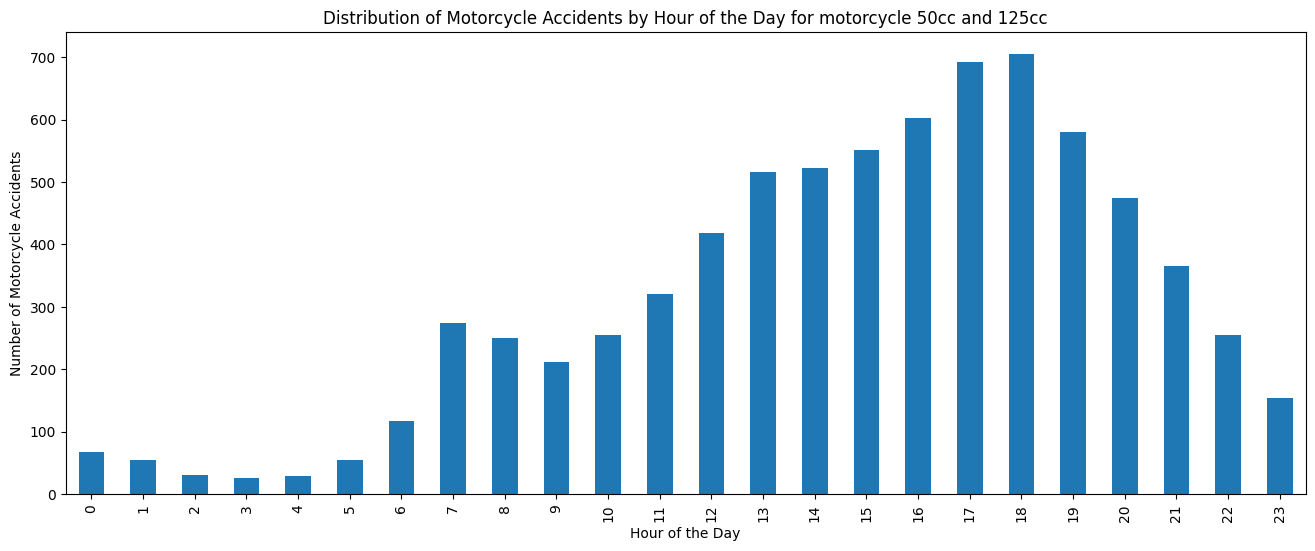

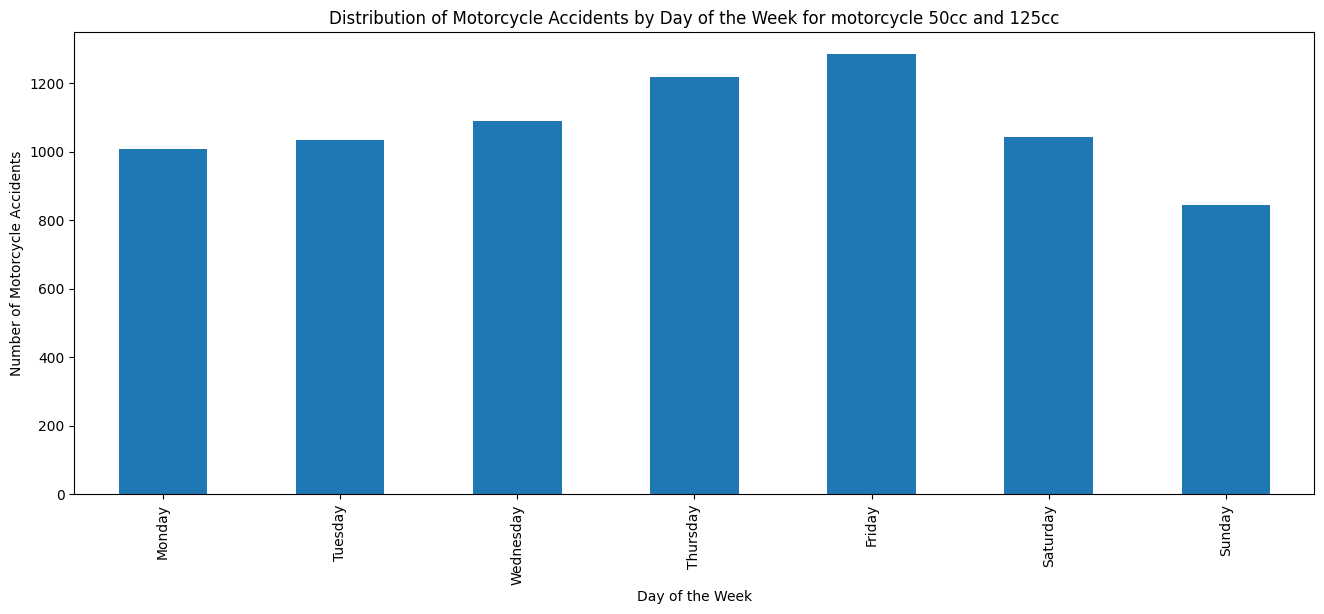

In [31]:
# run this data with the function
daysHoursAnalysis(vehicle2020_motorcycle50cc_125cc , 'Distribution of Motorcycle Accidents by Hour of the Day for motorcycle 50cc and 125cc' , 'Distribution of Motorcycle Accidents by Day of the Week for motorcycle 50cc and 125cc', 'Number of Motorcycle Accidents', 'Number of Motorcycle Accidents')

#### 7.3 Motorcycle between 125cc and 500cc

In [32]:
# filtering the vehicle type motorcycles up to 125cc
vehicle2020_motorcycle125cc_500cc = accident_vehicle2020[accident_vehicle2020["vehicle_type"] == 4]
vehicle2020_motorcycle125cc_500cc

accident_index  accident_year_x accident_reference_x  \
92      2020010228247             2020            010228247   
106     2020010228265             2020            010228265   
618     2020010229213             2020            010229213   
722     2020010229461             2020            010229461   
750     2020010229496             2020            010229496   
...               ...              ...                  ...   
166361  2020990997907             2020            990997907   
166744  2020991003397             2020            991003397   
166837  2020991004865             2020            991004865   
167039  2020991008057             2020            991008057   
167304  2020991012353             2020            991012353   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
92                   540175.0                190325.0   0.022290  51.594341   
106                  530914.0                171051.0  -0.118477  51.423358   
618                  537758.0                180583.0  -0.016392  51.507395   
722                  525782.0                175011.0  -0.190844  51.460109   
750                  525530.0                176729.0  -0.193861  51.475605   
...                       ...                     ...        ...        ...   
166361               339411.0                734101.0  -2.985692  56.495066   
166744               361508.0                862416.0  -2.646571  57.649987   
166837               322240.0                672056.0  -3.246292  55.935244   
167039               324394.0                672836.0  -3.212041  55.942595   
167304               318037.0                745230.0  -3.336269  56.591779   

        police_force  accident_severity  number_of_vehicles  ...  \
92                 1                  3                   2  ...   
106                1                  3                   1  ...   
618                1                  3                   2  ...   
722                1                  3                   3  ...   
750                1                  3                   3  ...   
...              ...                ...                 ...  ...   
166361            99                  2                   1  ...   
166744            99                  2                   3  ...   
166837            99                  2                   2  ...   
167039            99                  3                   2  ...   
167304            99                  3                   2  ...   

        journey_purpose_of_driver sex_of_driver age_of_driver  \
92                              6             1            39   
106                             6             1            33   
618                             2             1            44   
722                             6             1            26   
750                             6             1            18   
...                           ...           ...           ...   
166361                          6             1            21   
166744                          5             1            29   
166837                          5             2            27   
167039                          1             1            38   
167304                          5             1            48   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
92                      7                 125               1              7   
106                     6                 125               1              3   
618                     7                 395               1             10   
722                     6                 499               1             16   
750                     4                  -1              -1             -1   
...                   ...                 ...             ...            ...   
166361                  5                  -1              -1             -1   
166744                  6                 249               1  

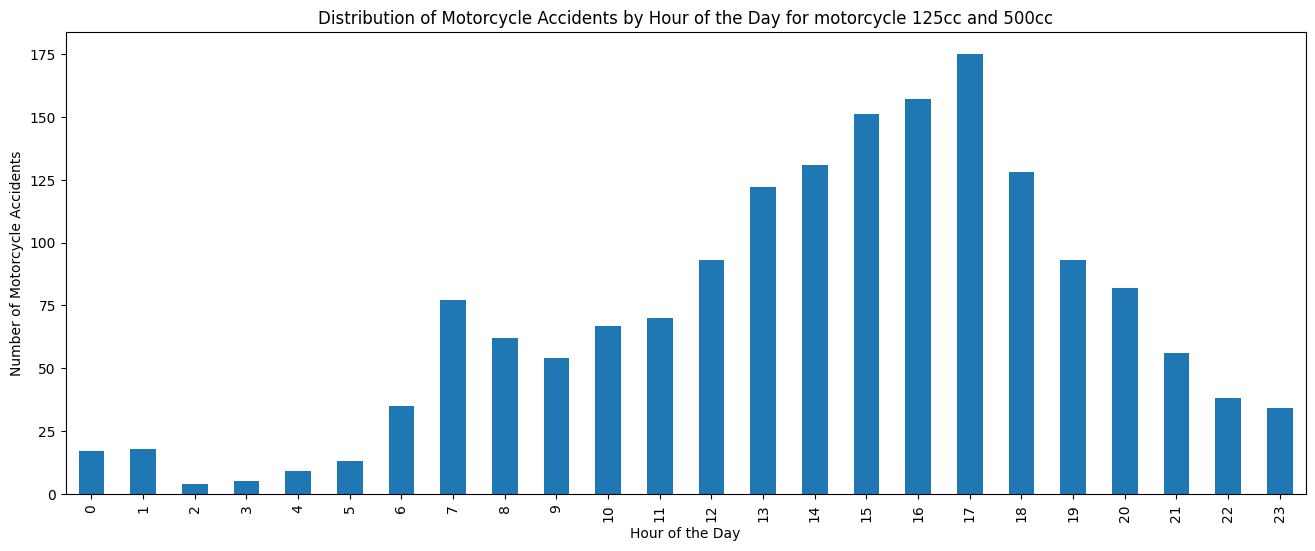

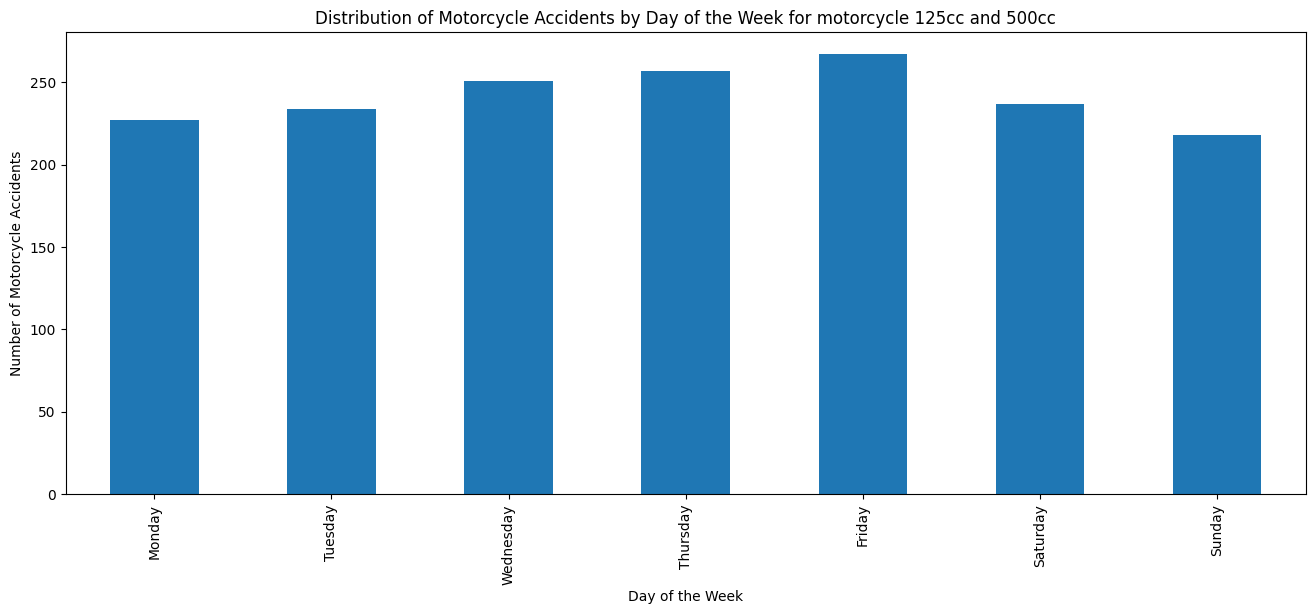

In [33]:
# run this data with the function
daysHoursAnalysis(vehicle2020_motorcycle125cc_500cc , 'Distribution of Motorcycle Accidents by Hour of the Day for motorcycle 125cc and 500cc' , 'Distribution of Motorcycle Accidents by Day of the Week for motorcycle 125cc and 500cc', 'Number of Motorcycle Accidents', 'Number of Motorcycle Accidents')

#### 7.3 Motorcycle  500cc and over

In [34]:
# filtering the vehicle type motorcycles 500cc and over
vehicle2020_motorcycle500cc = accident_vehicle2020[accident_vehicle2020["vehicle_type"] == 5]
vehicle2020_motorcycle500cc

accident_index  accident_year_x accident_reference_x  \
119     2020010228283             2020            010228283   
334     2020010228659             2020            010228659   
381     2020010228738             2020            010228738   
402     2020010228796             2020            010228796   
450     2020010228865             2020            010228865   
...               ...              ...                  ...   
166742  2020991003397             2020            991003397   
166754  2020991003505             2020            991003505   
166835  2020991004857             2020            991004857   
167128  2020991009395             2020            991009395   
167371  2020991030297             2020            991030297   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
119                  524504.0                178619.0  -0.207961  51.492817   
334                  530728.0                187433.0  -0.115087  51.570623   
381                  515249.0                183075.0  -0.339757  51.534826   
402                  530758.0                179386.0  -0.117641  51.498300   
450                  548578.0                178347.0   0.138462  51.484565   
...                       ...                     ...        ...        ...   
166742               361508.0                862416.0  -2.646571  57.649987   
166754               326207.0                669768.0  -3.182182  55.915317   
166835               338547.0                731820.0  -2.999184  56.474464   
167128               276154.0                663826.0  -3.979814  55.851675   
167371               383664.0                810646.0  -2.271903  57.186317   

        police_force  accident_severity  number_of_vehicles  ...  \
119                1                  2                   2  ...   
334                1                  3                   2  ...   
381                1                  3                   4  ...   
402                1                  3                   2  ...   
450                1                  3                   2  ...   
...              ...                ...                 ...  ...   
166742            99                  2                   3  ...   
166754            99                  2                   1  ...   
166835            99                  2                   2  ...   
167128            99                  3                   2  ...   
167371            99                  2                   2  ...   

        journey_purpose_of_driver sex_of_driver age_of_driver  \
119                             6             1            35   
334                             6             1            48   
381                             2             1            40   
402                             6             1            31   
450                             6             1            18   
...                           ...           ...           ...   
166742                          5             1            30   
166754                          5             1            53   
166835                          2             1            50   
167128                          5             1            48   
167371                          5             1            38   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
119                     6                 600               1              8   
334                     8                1200               1             17   
381                     7                 647               1              2   
402                     6                 865               1             15   
450                     4                 847               1              3   
...                   ...                 ...             ...            ...   
166742                  6                 599               1             19   
166754                  8                 649               1  

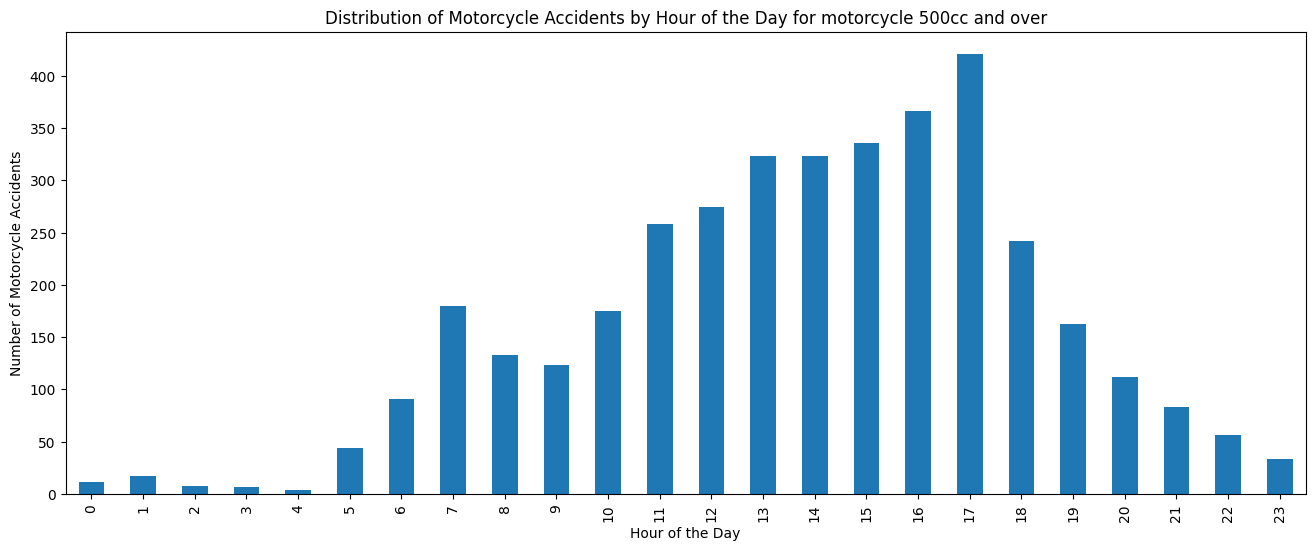

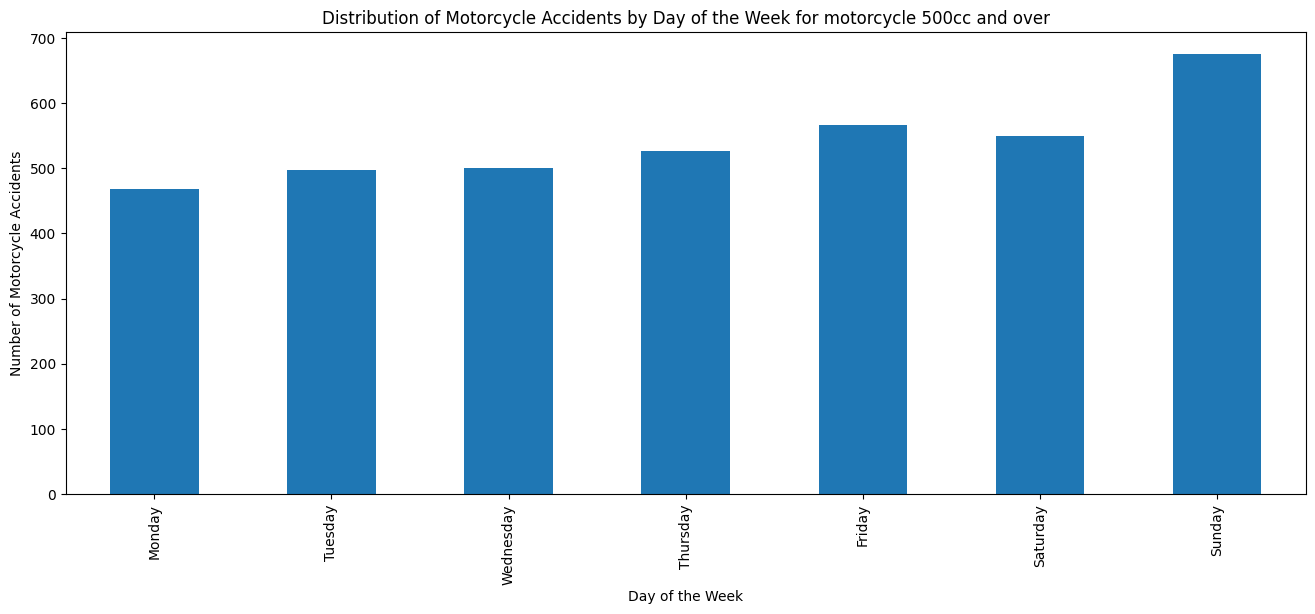

In [35]:
# run this data with the function
daysHoursAnalysis(vehicle2020_motorcycle500cc , 'Distribution of Motorcycle Accidents by Hour of the Day for motorcycle 500cc and over' , 'Distribution of Motorcycle Accidents by Day of the Week for motorcycle 500cc and over', 'Number of Motorcycle Accidents', 'Number of Motorcycle Accidents')

### 8.0 For Pedestrain involved in accident are there significant hours of the day , and days of the week on which they are likely involved with accidents? 

In [36]:
#  Merging the accident2020  to the casualty2020 using accident_index as the foreign key
accident_casualty2020 = pd.merge(accident2020, casualty2020, left_on='accident_index', right_on='accident_index', how='inner')
accident_casualty2020

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010220496             2020            010220496   
3       2020010228005             2020            010228005   
4       2020010228006             2020            010228006   
...               ...              ...                  ...   
115579  2020991027064             2020            991027064   
115580  2020991029573             2020            991029573   
115581  2020991030297             2020            991030297   
115582  2020991030900             2020            991030900   
115583  2020991032575             2020            991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    529337.0                176237.0  -0.139253  51.470327   
3                    526432.0                182761.0  -0.178719  51.529614   
4                    538676.0                184371.0  -0.001683  51.541210   
...                       ...                     ...        ...        ...   
115579               343034.0                731654.0  -2.926320  56.473539   
115580               257963.0                658891.0  -4.267565  55.802353   
115581               383664.0                810646.0  -2.271903  57.186317   
115582               277161.0                674852.0  -3.968753  55.950940   
115583               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  3                   1  ...   
4                  1                  2                   1  ...   
...              ...                ...                 ...  ...   
115579            99                  2                   2  ...   
115580            99                  3                   1  ...   
115581            99                  2                   2  ...   
115582            99                  3                   2  ...   
115583            99                  3                   1  ...   

        age_band_of_casualty casualty_severity pedestrian_location  \
0                          6                 3                   9   
1                          1                 3                   1   
2                          1                 3                   1   
3                          5                 3                   5   
4                          8                 2                   4   
...                      ...               ...                 ...   
115579                     3                 2                   0   
115580                     9                 3                  10   
115581                     7                 2                   0   
115582                    11                 3                   0   
115583                     8                 3                   9   

       pedestrian_movement  car_passenger bus_or_coach_passenger  \
0                        5              0                      0   
1                        1              0                      0   
2                        1              0                      0   
3                        9              0                      0   
4                        1              0                      0   
...                    ...            ...                    ...   
115579                   0              0                      0   
115580                   1              0                      0   
115581                   0     

In [37]:
#filtering the pedestrain with casualty class
accident_pedestrain = accident_casualty2020[accident_casualty2020["casualty_class"] == 3]
accident_pedestrain

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010220496             2020            010220496   
3       2020010228005             2020            010228005   
4       2020010228006             2020            010228006   
...               ...              ...                  ...   
115573  2020991023621             2020            991023621   
115574  2020991023880             2020            991023880   
115578  2020991024526             2020            991024526   
115580  2020991029573             2020            991029573   
115583  2020991032575             2020            991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    529337.0                176237.0  -0.139253  51.470327   
3                    526432.0                182761.0  -0.178719  51.529614   
4                    538676.0                184371.0  -0.001683  51.541210   
...                       ...                     ...        ...        ...   
115573               341791.0                733677.0  -2.946947  56.491558   
115574               342979.0                731116.0  -2.927095  56.468699   
115578               286242.0                717023.0  -3.841439  56.331864   
115580               257963.0                658891.0  -4.267565  55.802353   
115583               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  3                   1  ...   
4                  1                  2                   1  ...   
...              ...                ...                 ...  ...   
115573            99                  2                   1  ...   
115574            99                  3                   1  ...   
115578            99                  3                   1  ...   
115580            99                  3                   1  ...   
115583            99                  3                   1  ...   

        age_band_of_casualty casualty_severity pedestrian_location  \
0                          6                 3                   9   
1                          1                 3                   1   
2                          1                 3                   1   
3                          5                 3                   5   
4                          8                 2                   4   
...                      ...               ...                 ...   
115573                     8                 2                   8   
115574                     9                 3                   5   
115578                    10                 3                   6   
115580                     9                 3                  10   
115583                     8                 3                   9   

       pedestrian_movement  car_passenger bus_or_coach_passenger  \
0                        5              0                      0   
1                        1              0                      0   
2                        1              0                      0   
3                        9              0                      0   
4                        1              0                      0   
...                    ...            ...                    ...   
115573                   1              0                      0   
115574                   1              0                      0   
115578                   9     

In [38]:
# checking for unique values after filtering!
accident_pedestrain["casualty_class"].unique()

array([3])

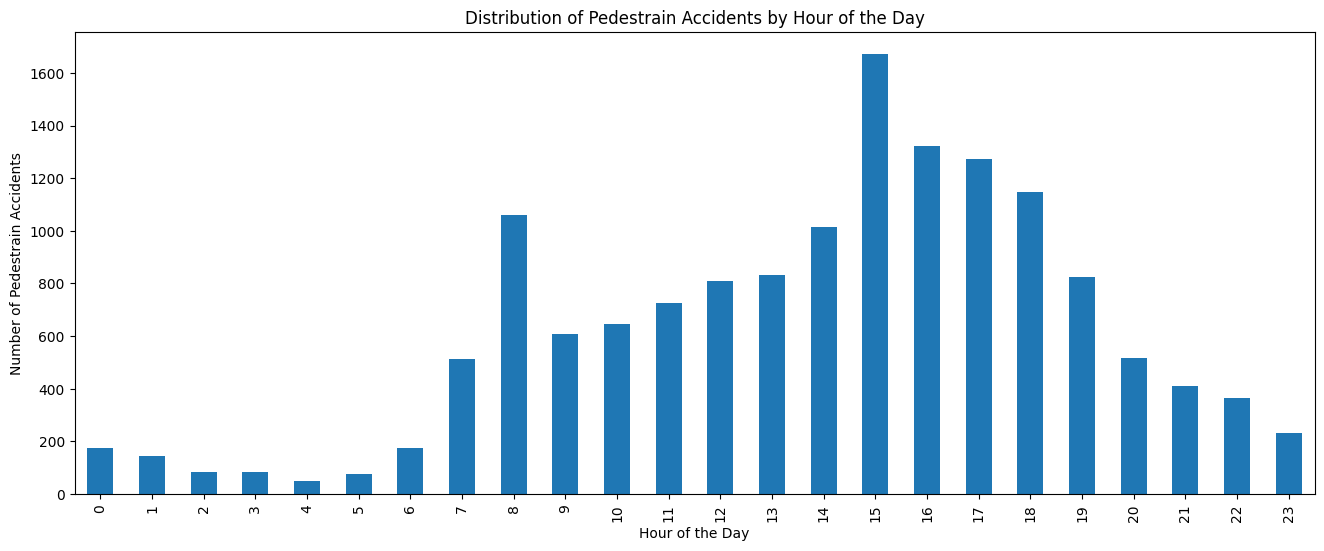

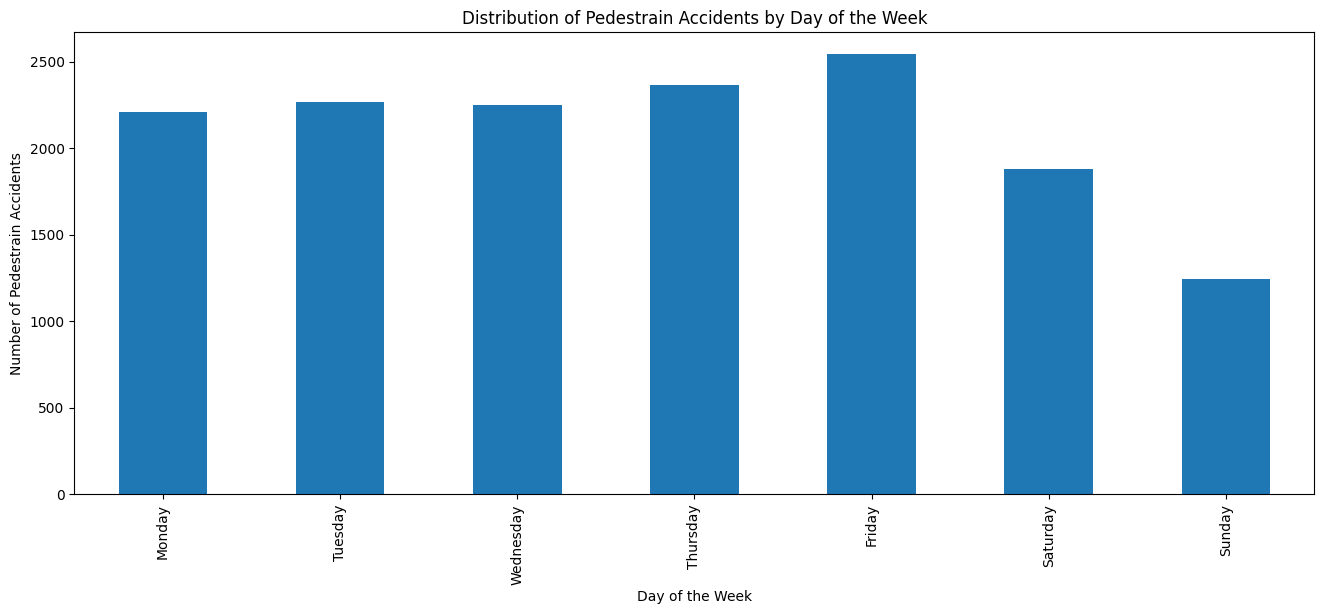

In [39]:
# run this data with the function
daysHoursAnalysis(accident_pedestrain , 'Distribution of Pedestrain Accidents by Hour of the Day' , 'Distribution of Pedestrain Accidents by Day of the Week', 'Number of Pedestrain Accidents', 'Number of Pedestrain Accidents')

### 9.0 Using Aprior Algorithm , explore the impact of selected variables on accident severity


In [40]:
# importing the right library to investigate
from mlxtend.frequent_patterns import apriori

In [41]:
# Replacing all NaN values with 'Unknown'
accident2020=accident2020.dropna()

#converting accident severity categorical data to numbers using dummies 
acc_severity = pd.get_dummies(accident2020.accident_severity, prefix="severity", dtype=int)

spp_severity = pd.get_dummies(accident2020.speed_limit, prefix="speed", dtype=int)

wei_severity = pd.get_dummies(accident2020.weather_conditions, prefix="weather", dtype=int)


In [42]:
# concatenate the data together as a single dataframe
acc_severity_onehot_encode = pd.concat([acc_severity, spp_severity, wei_severity], axis=1)
acc_severity_onehot_encode

severity_1  severity_2  severity_3  speed_-1  speed_20  speed_30  \
0               0           0           1         0         1         0   
1               0           0           1         0         1         0   
2               0           0           1         0         0         1   
3               0           1           0         0         0         1   
4               0           0           1         0         0         1   
...           ...         ...         ...       ...       ...       ...   
91194           0           1           0         0         0         1   
91195           0           0           1         0         0         1   
91196           0           1           0         0         0         0   
91197           0           0           1         0         0         1   
91198           0           0           1         0         0         1   

       speed_40  speed_50  speed_60  speed_70  weather_-1  weather_1  \
0             0         0         0         0           0          0   
1             0         0         0         0           0          1   
2             0         0         0         0           0          1   
3             0         0         0         0           0          1   
4             0         0         0         0           0          1   
...         ...       ...       ...       ...         ...        ...   
91194         0         0         0         0           0          1   
91195         0         0         0         0           0          1   
91196         0         0         1         0           0          1   
91197         0         0         0         0           0          1   
91198         0         0         0         0           0          1   

       weather_2  weather_3  weather_4  weather_5  weather_6  weather_7  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
91194          0          0          0          0          0          0   
91195          0          0          0          0          0          0   
91196          0          0          0          0          0          0   
91197          0          0          0          0          0          0   
91198          0          0          0          0          0          0   

       weather_8  weather_9  
0              0          1  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
91194          0          0  
91195          0          0  
91196          0          0  
91197          0          0  
91198          0          0  

[91185 rows x 20 columns]

In [43]:
# using the Aprior function to get impact of variable on accident_severity variables
apriori(acc_severity_onehot_encode, min_support=0.2, use_colnames=True)

/opt/homebrew/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets
0  0.201272                       (severity_2)
1  0.783473                       (severity_3)
2  0.573099                         (speed_30)
3  0.775566                        (weather_1)
4  0.460032             (speed_30, severity_3)
5  0.603202            (severity_3, weather_1)
6  0.450206              (speed_30, weather_1)
7  0.359752  (speed_30, severity_3, weather_1)

### 10.0 Identify accidents in our region , Kingston upon hull

In [44]:
# Filtering accidents in regions like kingston upon hull , Humberside and east riding yorkshire
accident2020_hull = """
            SELECT * FROM accident a
            INNER JOIN lsoa l ON a.lsoa_of_accident_location = l.lsoa01cd
            INNER JOIN casualty AS c ON a.accident_index = c.accident_index
            INNER JOIN vehicle AS v ON a.accident_index = v.accident_index
            WHERE l.lsoa01nm LIKE '%Kingston Upon Hull%' 
            """
accident2020_hull_df = pd.read_sql_query(accident2020_hull , conn)
accident2020_hull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 90 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               6387 non-null   object 
 1   accident_year                                6387 non-null   int64  
 2   accident_reference                           6387 non-null   object 
 3   location_easting_osgr                        6387 non-null   float64
 4   location_northing_osgr                       6387 non-null   float64
 5   longitude                                    6387 non-null   float64
 6   latitude                                     6387 non-null   float64
 7   police_force                                 6387 non-null   int64  
 8   accident_severity                            6387 non-null   int64  
 9   number_of_vehicles                           6387 non-null   int64  
 10  

In [45]:
from sklearn.cluster import KMeans
import numpy as np


X = np.array(list(zip(accident2020_hull_df['latitude'],accident2020_hull_df['longitude'])))
print(X)

kmeans = KMeans(n_clusters=25, random_state=42).fit(X)

[[53.745044 -0.393435]
 [53.745044 -0.393435]
 [53.743082 -0.354873]
 ...
 [53.78275  -0.30888 ]
 [53.742609 -0.342063]
 [53.742609 -0.342063]]


In [46]:
kmeans.labels_
kmeans.predict(X)
kmeans.cluster_centers_

array([[53.76956463, -0.35693131],
       [53.77252673, -0.26715472],
       [53.76473606, -0.33084422],
       [53.7311925 , -0.37480983],
       [53.78372905, -0.31428435],
       [53.75400962, -0.31146464],
       [53.73760737, -0.39403964],
       [53.74333182, -0.35962936],
       [53.77290573, -0.38398338],
       [53.77584063, -0.32803153],
       [53.75677681, -0.27631298],
       [53.76024626, -0.35077481],
       [53.78437137, -0.36829213],
       [53.74604802, -0.3476042 ],
       [53.72637071, -0.41276847],
       [53.7534867 , -0.3743247 ],
       [53.74848324, -0.32383535],
       [53.7556481 , -0.29809765],
       [53.75266065, -0.40139374],
       [53.7519144 , -0.25759677],
       [53.79728971, -0.32745638],
       [53.77017744, -0.28850753],
       [53.78514931, -0.34363705],
       [53.74527993, -0.38014724],
       [53.77003098, -0.30811191]])

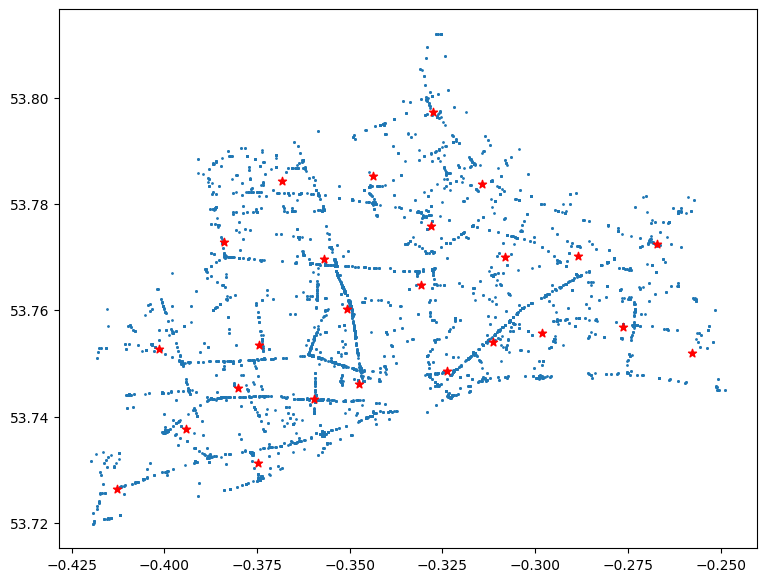

In [47]:
fig=plt.figure(figsize=(9,7))
plt.scatter(accident2020_hull_df['longitude'],accident2020_hull_df['latitude'],s=1)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],marker='*',c='red')

#### 10.1 Using Folium to plot a map for better visualization

In [48]:
#!pip3 install folium --break-system-packages

In [49]:
import folium


# Assuming accident2020_hull_df contains 'longitude' and 'latitude' columns
# And kmeans is your KMeans model already fitted with the accident data

# Create a folium map centered at the mean location of the accidents
center_lat = accident2020_hull_df['latitude'].mean()
center_lon = accident2020_hull_df['longitude'].mean()

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add accident locations to the map
for idx, row in accident2020_hull_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Add KMeans cluster centers to the map
for center in kmeans.cluster_centers_:
    folium.Marker(
        location=[center[0], center[1]],
        icon=folium.Icon(color='red', icon='star')
    ).add_to(m)


# Display the map in Jupyter Notebook (if you are using one)
m


### 11.0 Using Outlier Detection Methods. Identify unusual entries in your data set, Should you keep these entries in your data

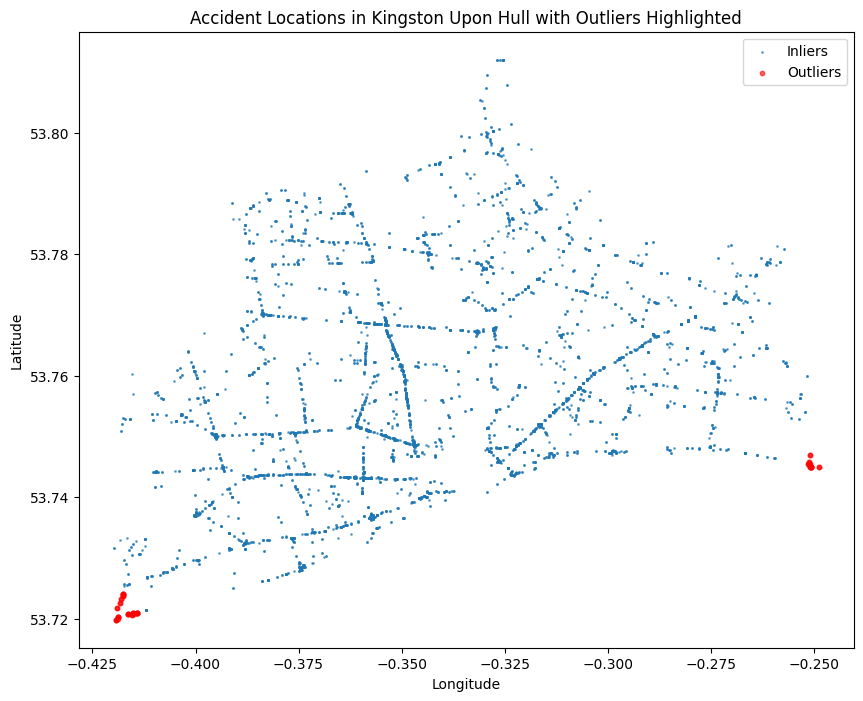

In [50]:
from sklearn.ensemble import IsolationForest

# Assuming accident2020_hull_df contains 'longitude' and 'latitude' columns

# Define the features for Isolation Forest
features = accident2020_hull_df[['longitude', 'latitude']]

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # contamination is the proportion of outliers in the data
iso_forest.fit(features)

# Predict the outliers
accident2020_hull_df['is_outlier'] = iso_forest.predict(features)

# Isolation Forest assigns -1 to outliers and 1 to inliers
outliers = accident2020_hull_df[accident2020_hull_df['is_outlier'] == -1]
inliers = accident2020_hull_df[accident2020_hull_df['is_outlier'] == 1]

# Plotting
plt.figure(figsize=(10, 8))

# Plot inliers
plt.scatter(inliers['longitude'], inliers['latitude'], s=1, label='Inliers', alpha=0.6)

# Plot outliers
plt.scatter(outliers['longitude'], outliers['latitude'], s=10, color='red', label='Outliers', alpha=0.6)

# Add title and labels
plt.title('Accident Locations in Kingston Upon Hull with Outliers Highlighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show plot
plt.show()


### 12.0 DEVELOP A CLASSIFICATION MODEL USING THE PROVIDED DATA THAT ACCURATELY PREDICTS FATAL INJURIES SUSTAINED IN ROAD TRAFFIC ACCIDENTS WITH THE AIM OF INFORMING AND IMPROVING ROAD SAFETY MEASURES?

In [58]:
### Filter Out  
accident2020_hull_df.select_dtypes(include=['object']).columns

Index(['accident_index', 'accident_reference', 'date', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'lsoa_of_accident_location', 'lsoa01cd', 'lsoa01nm', 'lsoa01nmw',
       'globalid', 'accident_index', 'accident_reference', 'accident_index',
       'accident_reference', 'generic_make_model'],
      dtype='object')

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [80]:
# Assuming casualty_severity is your target variable
target_variable = accident2020_hull_df["casualty_severity"]

# Extract features by dropping the target and some other columns
features = accident2020_hull_df.drop(["casualty_severity", "accident_index", "accident_reference"], axis=1)

# Verify the shape of the target variable
print(target_variable.shape)  # Should output (6387,)

# Select the object-type columns and filter out the duplicates
unique_object_columns = features.select_dtypes(include=['object']).columns.unique()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each unique object-type column and encode it
for column in unique_object_columns:
    if features[column].ndim == 1:  # Ensure the column is 1D
        features[column] = features[column].astype(str)  # Convert all values to strings
        features[column] = label_encoder.fit_transform(features[column])
    else:
        print(f"Skipping column {column} due to shape issue: {features[column].shape}")

# Separate features and target correctly
X = features  # Features
y = target_variable  # Target variable

# Ensure y is a 1-dimensional array
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Verify the transformation
print(X_train.head())
print(X_test.head())


(6387,)
Shape of y: (6387,)
      accident_year  location_easting_osgr  location_northing_osgr  longitude  \
3101      -0.367107              -0.373683               -0.949378  -0.388629   
4609       0.557264              -0.226123               -0.739398  -0.238222   
6024       1.481636              -0.472742               -0.945168  -0.486996   
471       -1.291478               0.336582                2.410293   0.378471   
3413      -0.367107               1.033694                1.295139   1.051408   

      latitude  police_force  accident_severity  number_of_vehicles  \
3101 -0.946639           0.0           0.485156           -0.178717   
4609 -0.739128           0.0           0.485156           -0.178717   
6024 -0.939426           0.0           0.485156           -0.178717   
471   2.422779           0.0           0.485156           -0.178717   
3413  1.275972           0.0           0.485156            2.112542   

      number_of_casualties      date  ...  sex_of_driver  

Accuracy Score:
0.9773082942097027
Confusion Matrix:


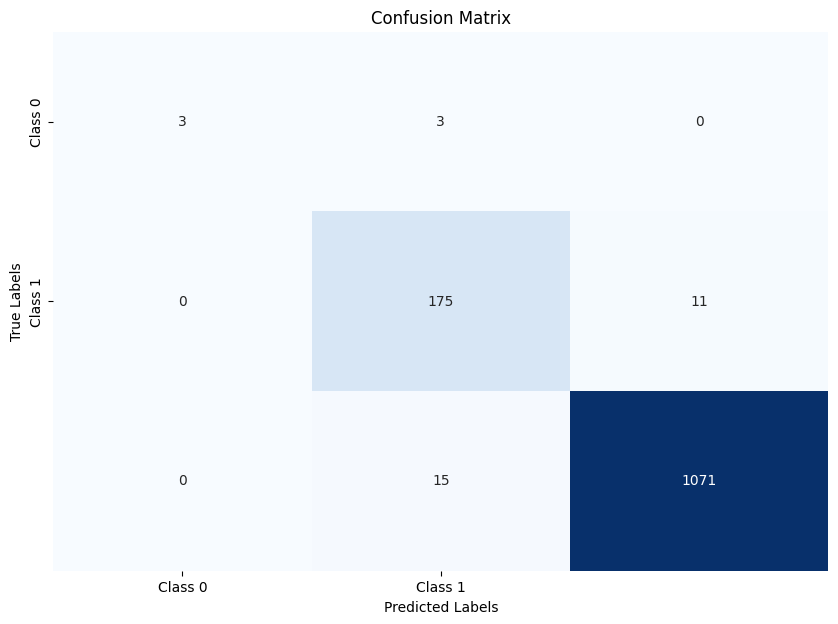

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         6
           2       0.91      0.94      0.92       186
           3       0.99      0.99      0.99      1086

    accuracy                           0.98      1278
   macro avg       0.97      0.81      0.86      1278
weighted avg       0.98      0.98      0.98      1278



In [82]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy Score:")
print(accuracy)

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))